In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(data.head())


   feature1  feature2  feature3  feature4  target
0       5.1       3.5       1.4       0.2  Class1
1       4.9       3.0       1.4       0.2  Class1
2       4.7       3.2       1.3       0.2  Class1
3       4.6       3.1       1.5       0.2  Class1
4       5.0       3.6       1.4       0.2  Class1


In [42]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()


feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64


In [52]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])



In [48]:
# Scale/normalize the features
scaler = StandardScaler()
df[['feature1', 'feature2', 'feature3', 'feature4']] = scaler.fit_transform(df[['feature1', 'feature2', 'feature3', 'feature4']])


In [54]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns


# Statistical summaries
print(df.describe())


           feature1      feature2      feature3      feature4      target
count  1.490000e+02  1.490000e+02  1.490000e+02  1.490000e+02  149.000000
mean  -1.430623e-16 -3.099683e-16  4.768743e-17 -1.430623e-16    1.006711
std    1.003373e+00  1.003373e+00  1.003373e+00  1.003373e+00    0.817847
min   -1.882359e+00 -2.425614e+00 -1.575313e+00 -1.456862e+00    0.000000
25%   -9.110290e-01 -5.863444e-01 -1.234147e+00 -1.193264e+00    0.000000
50%   -6.111554e-02 -1.265269e-01  3.579562e-01  1.247222e-01    1.000000
75%    6.673817e-01  5.631992e-01  7.559821e-01  7.837155e-01    2.000000
max    2.488625e+00  3.092195e+00  1.779477e+00  1.706306e+00    2.000000


<Figure size 100x50 with 0 Axes>

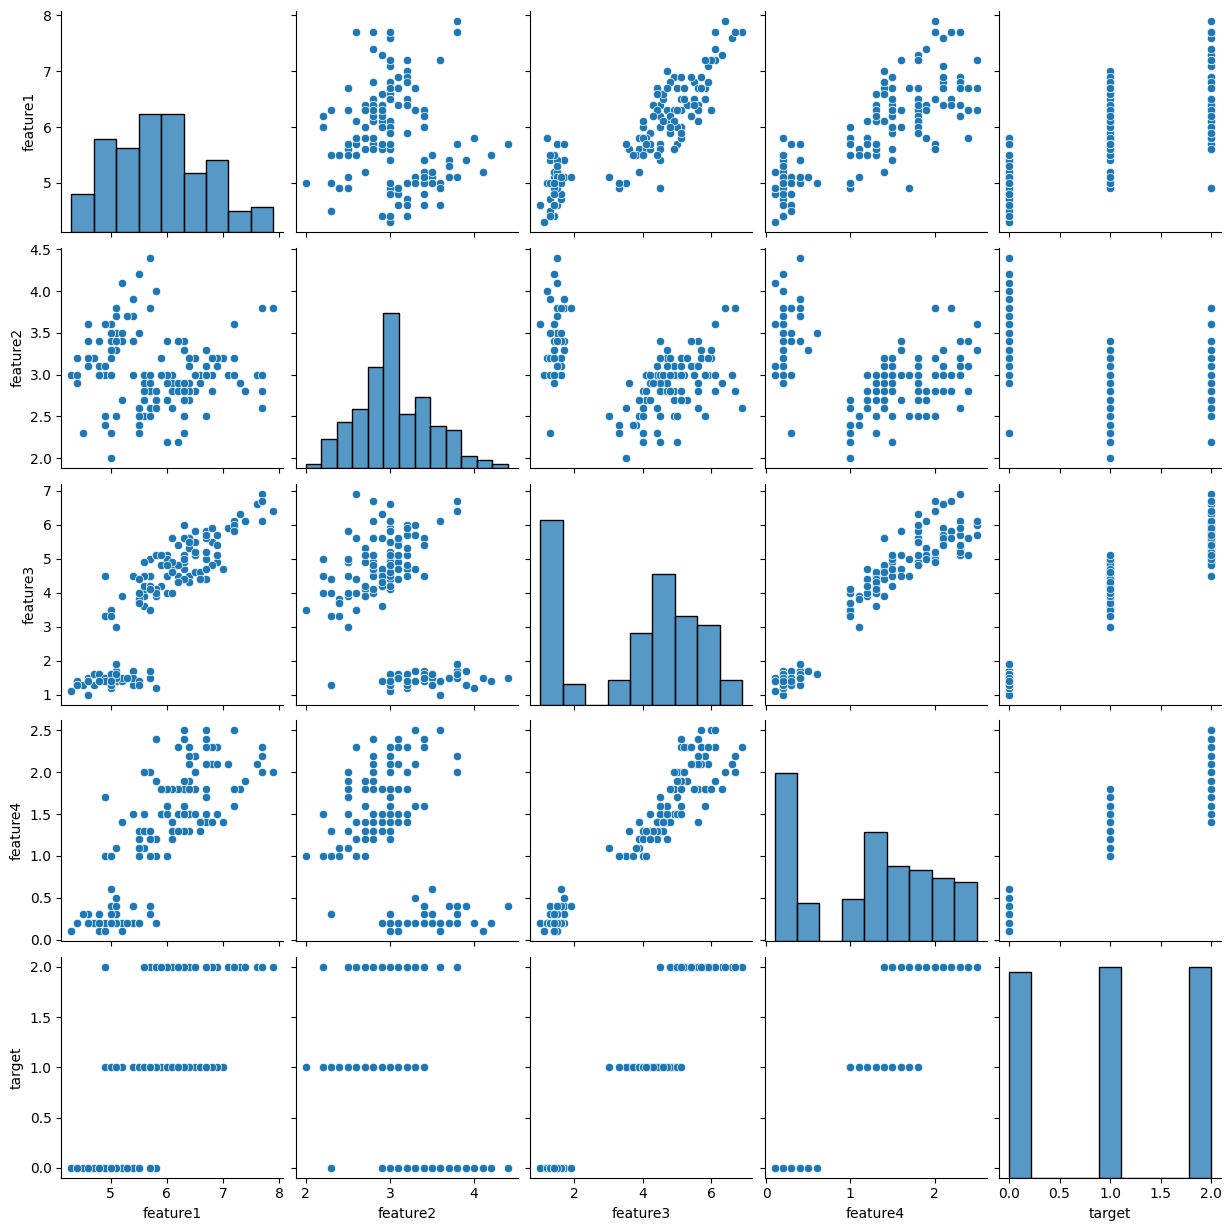

In [84]:
# Visualize the data distribution and relationships
plt.figure(figsize=(1, 0.5))
sns.pairplot(df)
plt.show()


In [ ]:
# Classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [60]:

# Split the dataset into features (X) and target (y)
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression:")
print("Confusion Matrix:\n", conf_matrix_lr)

# Accuracy for Logistic Regression
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Precision, Recall, F1 Score for Logistic Regression
average_method = 'weighted'  # or 'micro', 'macro', depending on your requirement

print("Precision:", precision_score(y_test, y_pred_lr, average=average_method))
print("Recall:", recall_score(y_test, y_pred_lr, average=average_method))
print("F1 Score:", f1_score(y_test, y_pred_lr, average=average_method))

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Confusion Matrix for Decision Tree Classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Classifier:")
print("Confusion Matrix:\n", conf_matrix_dt)

# Accuracy for Decision Tree Classifier
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Precision, Recall, F1 Score for Decision Tree Classifier
print("Precision:", precision_score(y_test, y_pred_dt, average=average_method))
print("Recall:", recall_score(y_test, y_pred_dt, average=average_method))
print("F1 Score:", f1_score(y_test, y_pred_dt, average=average_method))

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Confusion Matrix for Random Forest Classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Confusion Matrix:\n", conf_matrix_rf)

# Accuracy for Random Forest Classifier
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Precision, Recall, F1 Score for Random Forest Classifier
print("Precision:", precision_score(y_test, y_pred_rf, average=average_method))
print("Recall:", recall_score(y_test, y_pred_rf, average=average_method))
print("F1 Score:", f1_score(y_test, y_pred_rf, average=average_method))


Logistic Regression:
Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Accuracy: 0.9
Precision: 0.9214285714285714
Recall: 0.9
F1 Score: 0.896

Decision Tree Classifier:
Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Accuracy: 0.9
Precision: 0.9214285714285714
Recall: 0.9
F1 Score: 0.896

Random Forest Classifier:
Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Accuracy: 0.9
Precision: 0.9214285714285714
Recall: 0.9
F1 Score: 0.896


In [76]:
# Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("\nLinear Regression:")
print("R-squared:", r2_lr)
print("Mean Squared Error:", mse_lr)

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("\nDecision Tree Regressor:")
print("R-squared:", r2_dtr)
print("Mean Squared Error:", mse_dtr)




Linear Regression:
R-squared: 0.9165749856447737
Mean Squared Error: 0.0583048155882637

Decision Tree Regressor:
R-squared: 0.8569157392686804
Mean Squared Error: 0.1


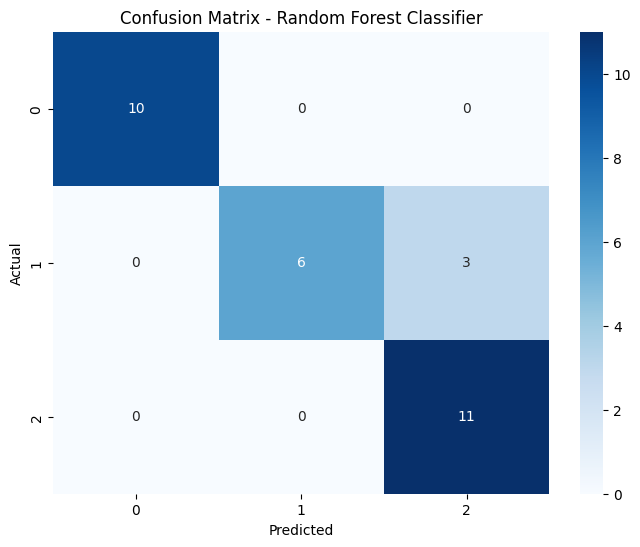

In [77]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix for the Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
# 6. Cross-Validation
from sklearn.model_selection import cross_val_score

# Cross-Validation for Classification Models
print("\nCross-Validation Scores:")
print("Logistic Regression:", cross_val_score(lr, X, y, cv=5).mean(), "±", cross_val_score(lr, X, y, cv=5).std())
print("Decision Tree Classifier:", cross_val_score(dt, X, y, cv=5).mean(), "±", cross_val_score(dt, X, y, cv=5).std())
print("Random Forest Classifier:", cross_val_score(rf, X, y, cv=5).mean(), "±", cross_val_score(rf, X, y, cv=5).std())

# Cross-Validation for Regression Models
print("\nLinear Regression:", cross_val_score(lr, X, y, cv=5, scoring='r2').mean(), "±", cross_val_score(lr, X, y, cv=5, scoring='r2').std())
print("Decision Tree Regressor:", cross_val_score(dtr, X, y, cv=5, scoring='r2').mean(), "±", cross_val_score(dtr, X, y, cv=5, scoring='r2').std())



Cross-Validation Scores:
Logistic Regression: 0.3211297123381488 ± 0.3948011769951609
Decision Tree Classifier: 0.9600000000000002 ± 0.03265986323710903
Random Forest Classifier: 0.9533333333333334 ± 0.024944382578492935

Linear Regression: 0.3211297123381488 ± 0.3948011769951609
Decision Tree Regressor: 0.5077998025366446 ± 0.42663328635961273
